<a href="https://colab.research.google.com/github/PriyaShah-79/CloudCredits-Internship/blob/main/Iris%20Flower%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy Score: 1.00

Confusion Matrix:


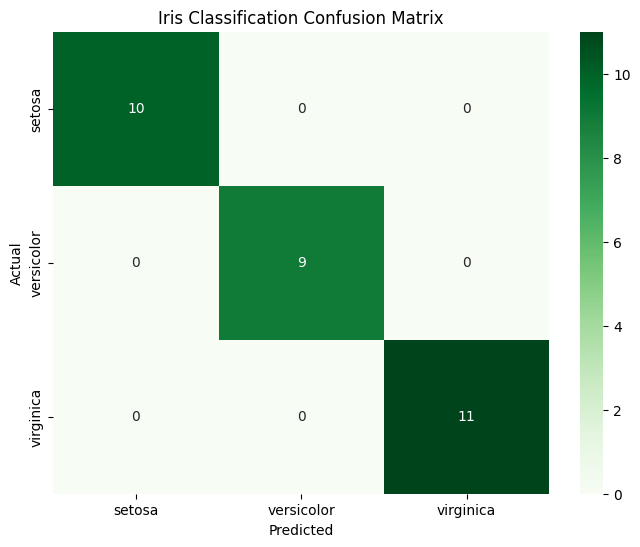

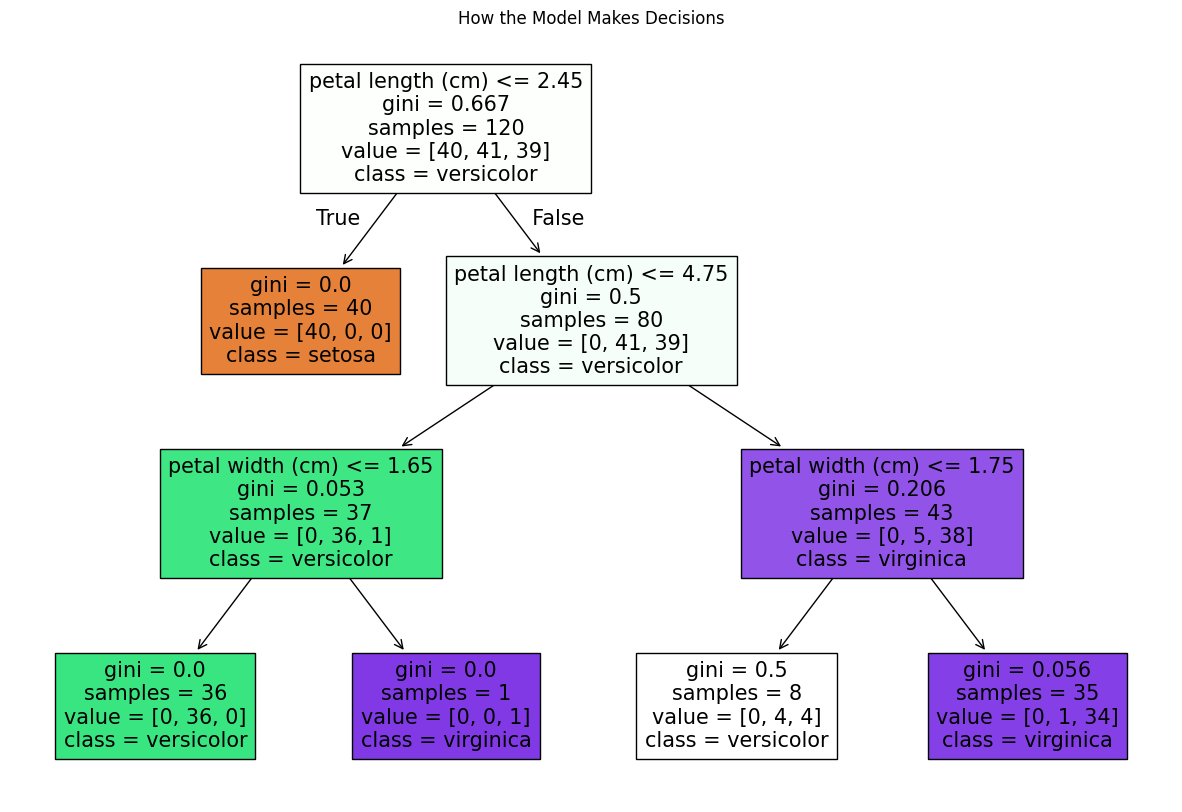

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# 2. Split the data (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize and Train the Model
# We set max_depth to 3 to keep the tree simple and prevent overfitting
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

# 4. Predictions
y_pred = model.predict(X_test)

# 5. Evaluation
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.2f}")
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)

# Visualizing the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, xticklabels=iris.target_names, yticklabels=iris.target_names, cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Iris Classification Confusion Matrix')
plt.show()

# 6. Impactful Visualization: The Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("How the Model Makes Decisions")
plt.show()

In [2]:
# 1. Install Gradio (The deployment library)
!pip install -q gradio

import gradio as gr
import numpy as np

# 2. Define the Prediction Function
# This function takes the 4 Iris measurements and returns the predicted name
def predict_flower(sepal_length, sepal_width, petal_length, petal_width):
    # Prepare the input as a 2D array for the model
    input_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])

    # Get prediction from our trained Decision Tree model
    prediction = model.predict(input_data)

    # Map the number (0, 1, 2) back to the flower name
    return iris.target_names[prediction][0]

# 3. Create the User Interface (UI)
# We use sliders to make it interactive and user-friendly
interface = gr.Interface(
    fn=predict_flower,
    inputs=[
        gr.Slider(4.0, 8.0, label="Sepal Length (cm)"),
        gr.Slider(2.0, 4.5, label="Sepal Width (cm)"),
        gr.Slider(1.0, 7.0, label="Petal Length (cm)"),
        gr.Slider(0.1, 2.5, label="Petal Width (cm)"),
    ],
    outputs=gr.Textbox(label="Predicted Species"),
    title="🌸 Iris Flower Species Classifier",
    description="Slide the values to see how the Machine Learning model categorizes the flower in real-time."
)

# 4. Launch the App
# share=True creates a public link valid for 72 hours
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5a3173e4441aed7f5b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
